In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/BadWizard/.matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
df = pd.read_csv('./world-development-indicators/Indicators.csv')
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [7]:
countries = df['CountryName'].unique().tolist()
len(countries)

247

In [9]:
indicators = df['IndicatorName'].unique().tolist()
len(indicators)

1344

In [10]:
years = df['Year'].unique().tolist()
len(years)

56

In [12]:
min(years), max(years)

(1960, 2015)

In [34]:
mask_emission = df['IndicatorName'].str.contains('CO2 emissions \(metric')
mask_US = df['CountryCode'].str.contains('USA')

In [42]:
stage = df[mask_US & mask_emission]
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


<Container object of 52 artists>

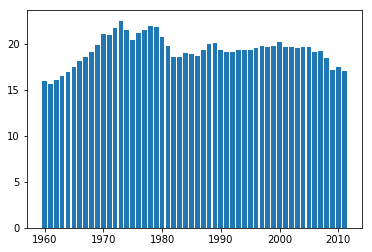

In [48]:
year = stage['Year'].values
co2 = stage['Value'].values

plt.bar(year, co2)

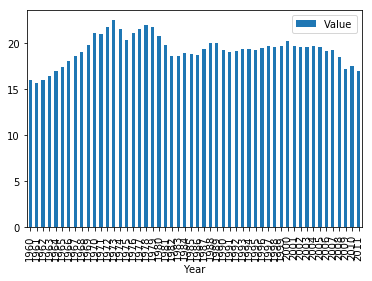

In [60]:
stage[['Year','Value']].plot(x = 'Year', y = 'Value',
                             xticks = [1, 10, 20 , 30 , 40, 50], kind = 'bar')

[1960, None, 0, 25]

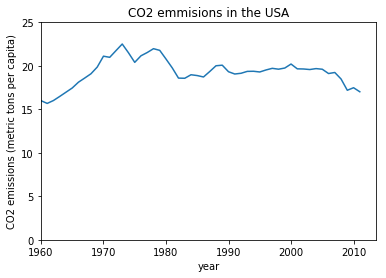

In [80]:
plt.plot(stage['Year'].values, stage['Value'].values)
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.xlabel('year')
plt.title('CO2 emmisions in the USA')
plt.axis([1960, None, 0, 25])

In [72]:
stage['IndicatorName'].iloc[0]

'CO2 emissions (metric tons per capita)'

In [81]:
hist_data = stage['Value'].values

''

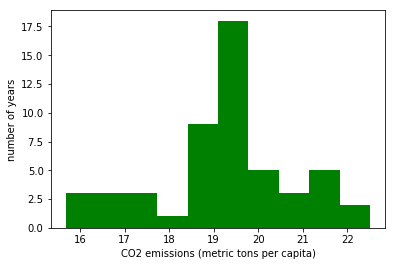

In [88]:
plt.hist(hist_data, 10, normed = False, facecolor = 'green')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('number of years')
;

In [101]:
hist_indicator = stage['IndicatorName'].iloc[0]
hist_year = 2011

mask1 = df['IndicatorName'] == hist_indicator
mask2 = df['Year'].isin([hist_year])
#mask2 = df['Year'] == hist_year

co2_2011 = df[mask1 & mask2]

''

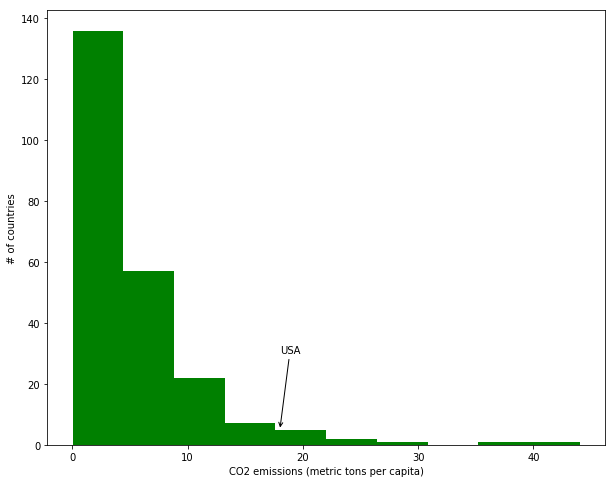

In [111]:
fig, ax = plt.subplots(figsize=(10,8))

plt.hist(co2_2011['Value'], bins = 10, normed = False, facecolor = 'green')
plt.ylabel('# of countries')
plt.xlabel(hist_indicator)

ax.annotate('USA',xy = (18,5), xycoords = 'data',
            xytext = (18,30), textcoords = 'data',
           arrowprops = {'arrowstyle': '->',
                        'connectionstyle': 'arc3'})
;

In [125]:
mask1 = df['IndicatorName'].str.contains('GDP per capita \(constant 2005')
print(mask1.value_counts())

mask2 = df['CountryCode'].str.contains('USA')

gdp_stage = df[mask1 & mask2]
gdp_stage.head()

False    5646507
True        9951
Name: IndicatorName, dtype: int64


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


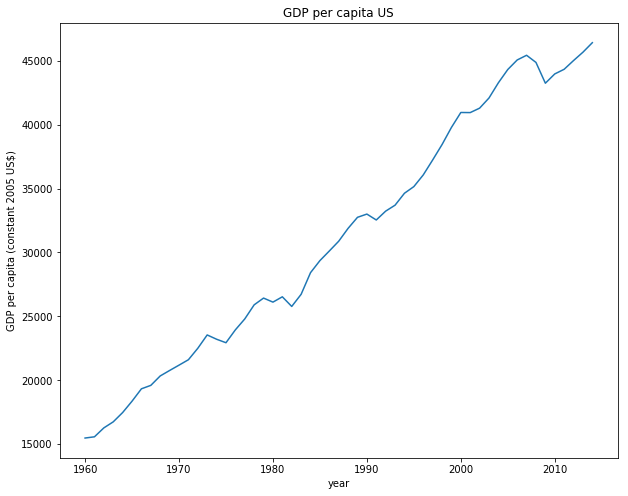

In [134]:
fig, ax = plt.subplots(figsize = (10,8))

plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)
plt.xlabel('year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP per capita US')

In [139]:
print(min(gdp_stage['Year']), max(gdp_stage['Year']), gdp_stage.shape[0])

print(min(stage['Year']), max(stage['Year']), stage.shape[0])

1960 2014 55
1960 2011 52


In [140]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

In [141]:
print(min(gdp_stage['Year']), max(gdp_stage_trunc['Year']), gdp_stage_trunc.shape[0])
print(min(stage['Year']), max(stage['Year']), stage.shape[0])

1960 2011 52
1960 2011 52


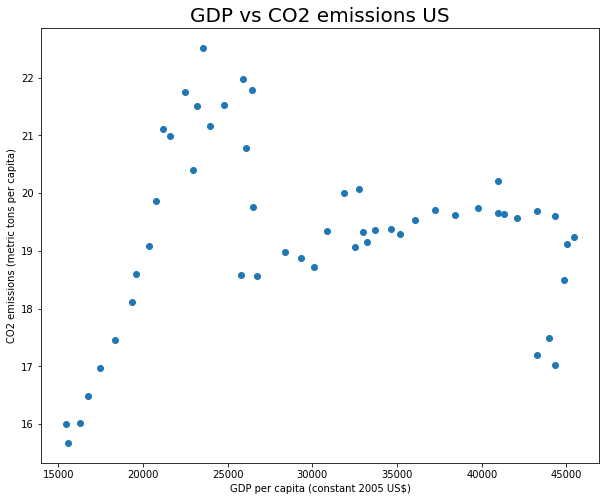

In [148]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(gdp_stage_trunc['Value'], stage['Value'])

ax.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0])
ax.set_ylabel(stage['IndicatorName'].iloc[0])
ax.set_title('GDP vs CO2 emissions US', fontsize = 20)